# How to Develop an End-to-End Machine Learning Project

http://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [2]:
!ls data

auto-mpg.data


In [3]:
!head data/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [5]:
import pandas as pd

In [16]:
data = """
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete"""

In [30]:
cols = [line.split(". ")[1].split(":")[0].replace(" ", "_") for line  in data.split("\n") if line != ""]

In [45]:
def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path,
                     names=cols,
                     sep=" ", 
                     na_values="?",
                     skipinitialspace=True, 
                     comment="\t")
    return df

In [46]:
data = load_data("data/auto-mpg.data")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [48]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [49]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [51]:
data["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

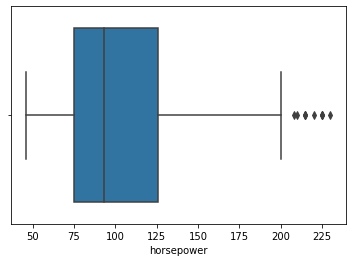

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data["horsepower"])
plt.show()

In [58]:
median = data["horsepower"].median()

In [60]:
data["horsepower"] = data["horsepower"].fillna(median)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [64]:
data["cylinders"].value_counts() / len(data) *100

4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: cylinders, dtype: float64

In [65]:
data["origin"].value_counts() / len(data) *100

1    62.562814
3    19.849246
2    17.587940
Name: origin, dtype: float64

In [66]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

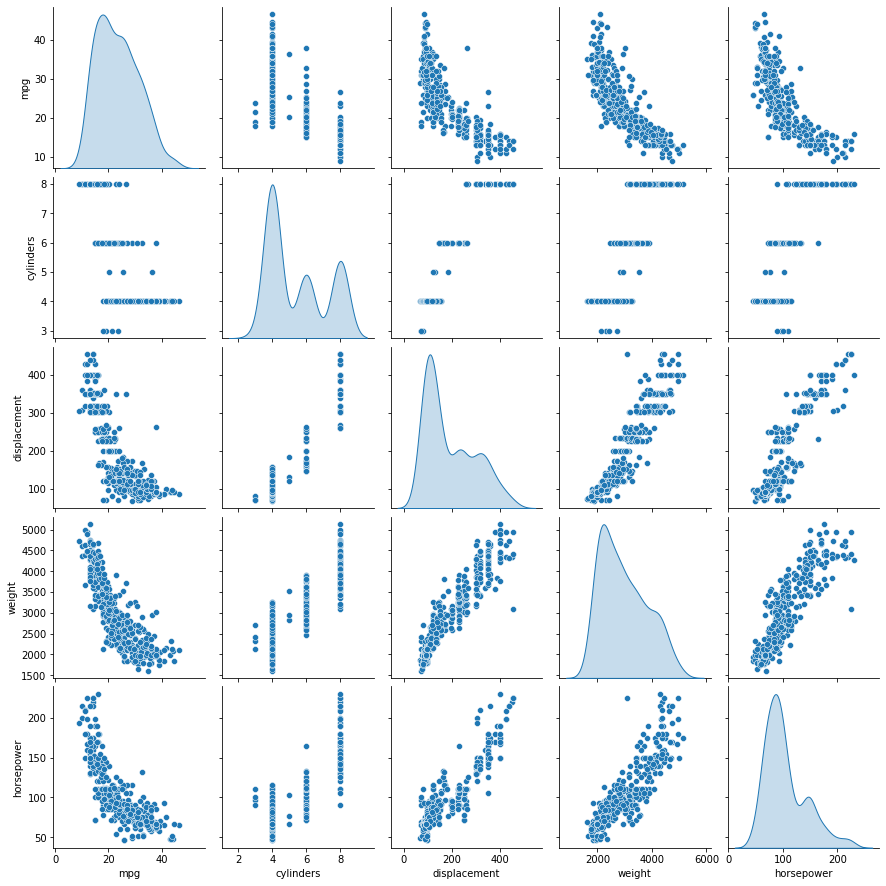

In [68]:
sns.pairplot(data[['mpg', 'cylinders', 'displacement', 'weight', 'horsepower']], diag_kind="kde")
plt.show()

## Razdelimo na train in test set

In [69]:
data = load_data("data/auto-mpg.data")
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [70]:
data["cylinders"].value_counts() / len(data) *100

4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: cylinders, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [77]:
y = data["mpg"]
X = data.drop(columns=["mpg"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train["cylinders"].value_counts() / len(X_train) *100

4    50.943396
8    24.842767
6    22.012579
3     1.257862
5     0.943396
Name: cylinders, dtype: float64

In [80]:
X_test["cylinders"].value_counts() / len(X_test) *100

4    52.5
8    30.0
6    17.5
Name: cylinders, dtype: float64

Vididmo da train split ni najbolj primeren, se odločimo na StratifiedShuffleSplit

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [93]:
strat_train_set["cylinders"].value_counts() / len(strat_train_set) *100

4    51.257862
8    25.786164
6    21.069182
5     0.943396
3     0.943396
Name: cylinders, dtype: float64

In [94]:
strat_test_set["cylinders"].value_counts() / len(strat_test_set) *100

4    51.25
8    26.25
6    21.25
3     1.25
Name: cylinders, dtype: float64

In [95]:
def split_df_train_test(data, test_size=0.2):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    for train_index, test_index in split.split(data, data["cylinders"]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
        
    print(f"Train data size: {strat_train_set.shape}")
    print(f"Test data size: {strat_test_set.shape}")
    return strat_train_set, strat_test_set

In [96]:
data = load_data("data/auto-mpg.data")
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].median())
train, test = split_df_train_test(data)

Train data size: (318, 8)
Test data size: (80, 8)


## Predprocessing - po korakih

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_enoder = OneHotEncoder()
cat_1hot = cat_enoder.fit_transform(data["origin"].values.reshape(-1, 1))
cat_1hot.toarray()[:5]

In [118]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data["horsepower"].values.reshape(-1,1))

SimpleImputer(strategy='median')

## Preprocessing

In [102]:
def add_complexity_cols(df):
    df["origin"] = df["origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def num_pipeline_transformer(data):
    num_pipeline = Pipeline([
        ("imputer",  SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler())
    ])
    return num_pipeline


def pipeline_trnsformer(data: pd.DataFrame):
    cat_attrs = ["origin"]
    num_attrs = list(data.select_dtypes(include=["float64", "int64"]))
    
    num_pipeline = num_pipeline_transformer(data)
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs)
    ])
    full_pipeline.fit(data)
    return full_pipeline    

In [129]:
data = load_data("data/auto-mpg.data")
data = add_complexity_cols(data)

train, test = split_df_train_test(data)

# split target and features
train_y = train["mpg"]
train_X = train.drop(columns=["mpg"])
test_y = test["mpg"]
test_X = test.drop(columns=["mpg"])

# pre-procesing podatkov
transformation_pipeline = pipeline_trnsformer(train_X)
train_X_transformed = transformation_pipeline.transform(train_X)

Train data size: (318, 8)
Test data size: (80, 8)


In [130]:
train_X_transformed

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# dopolnimo manjkajoče frednsoti z mediano